# Analyze Salary with Linear Regression
Python Automation; Scott Schmidt; Illinois State University

The main purpose of this assignment is to do linear regression without the use of imports so that one gains a full understanding of statistics and Python.

## Section Summaries
1. The dataset will have two columns of data which are years and salary. 
2. Split the data using 75% training and 25% testing. 
3. Calculate Covariance and Variance to find the coefficients. 
4. Evaluate the model performance using Root Mean Square Error (RMSE).
5. R_Squared using no imports
6. Full Linear Regression process with sklearn imports
7. Plot Graph data with line of best fit


## Math Functions
Three functions called sumList(), meanList(), and stdevList() will be used to calculate the mean and standard deviation of any given list. Each function has a list as an input, and returns the corresponding result (i.e., sum, mean, min, max, stdev, etc.). Please note: a) meanList() should use sumList() to calculate the summation of a list; b) stdevList() should use meanList() to calculate the mean value; c) minMaxList() should return both min and max values.

In [ ]:
#Return the total:
def sumList(numbers):
    count=0
    numbers=list(numbers)
    for n in numbers:
        count=count+float(n)
    total=round(count,2)
    return total

#Return the mean:
def meanList(numbers):
    numbers=list(numbers)
    total=sumList(numbers)
    mean=round(total/len(numbers),2)
    return mean

#Return the standard deviation:
def stdevList(mean):
    var=0 #variance
    for d in data:
        n=d-mean
        n2=n*n
        var=var+n2
    std=var/len(data)
    std=round(std**0.5,2)
    return std

# 1)View Data
Read the csv file and display the data below. There is no missing data.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error

sFile=r'/kaggle/input/salary/salary.csv'
sDF = pd.read_csv(sFile, header=None, names=['years', 'salary'])
sDF

# 2) Split Data
Function will be called train_test_split that will split the dataset List into a training set and a test based on 75% for training and 25% for testing. Normally, one can use 
`from sklearn.model_selection import train_test_split` to do this but in this case the train_test_split function will do this manually. A list sent to this function will get split by a ratio as a way to use training data to make future predictions on the test data.

In [ ]:
def train_test_split(aList, ratio):
    elements = len(aList)
    middle = int(elements * ratio)
    trainSet=[aList[:middle]]
    testSet=[aList[middle:]]
    return list(trainSet), list(testSet)

# 3)Calculate Variance, Covariance, and Coefficients
 Some basic math functions used in this section will will be: <br>
`
mean=meanList(data)
stdev=stdevList(mean)
`

#### Variance Function
Variance is a numeric measurement of how far a dataset is more a mean. In this section we will calculate covariance and variance from the training dataset.

In [ ]:
# Calculate the variance of a list of numbers:
def varianceList(aList):
    # calculate mean
    m = meanList(aList)

    # calculate variance using a list comprehension
    var = sum((xi - m) ** 2 for xi in aList) / len(aList)
    return var

#### Covariance Function
Covariance measures the relationships between two assets. A positive correlation would be found between the Nadsaq and Apple. When the tech sector does well during a duration of time, normally, so does Apple.

In [ ]:
#Calculate the covariance of two lists of numbers:
def covarianceList(x, y):
    # Finding the mean of the series x and y
    mean_x = meanList(x)
    mean_y = meanList(y)
    
    # Subtracting mean from the individual elements
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

#### Calculate Coefficients Function
Calculate the {w}_{0} and {w}_{1} values <br>
Hint: Calculate the covariance of two lists of numbers: <br>
The input is a list with each item a list   [x, y] <br>
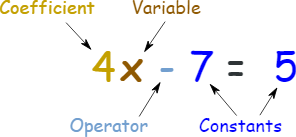!

In [ ]:
def coefficeints(trainingDatasetList):
    x=list(trainingDatasetList[0])
    y=list(trainingDatasetList[1])

    w1 = covarianceList(x, y) / float(varianceList(x))
 
    # Coefficient W0 = mean of y_readings - ( W1 * the mean of the x_readings )
    w0 = meanList(y) - (w1 * meanList(x))
    return w0, w1

In [ ]:
#GET DATA IN FORM OF X AND Y:
sDF=sDF.reset_index()
x=sDF['years']
y=sDF['salary']
x=list(x)
y=list(y)

#SPLIT DATA:
x_train, x_test=train_test_split(x, .25)
y_train, y_test=train_test_split(y, .25)

#Turn double bracket list into single bracket list:
x_train, y_train,x_test, y_test=x_train[0], y_train[0],x_test[0], y_test[0]

#COVARIANCE:
cov=round(covarianceList(x_train,y_train),4)
print("The covariance is: ", cov)

#VARIANCE:
var=round(varianceList(x_train),4)
print("The variance is: ", var)

#COEFFICIENTS:
trainingDatasetList= [x_train, y_train]
coef=coefficeints(trainingDatasetList)
print("The coefficients are: ", coef)

w0=coef[0]
w1=coef[1]
print(w0)
print(w1)

### Make Prediction
Based on the coeficients between year and salary, we can make a prediction of what an individual would make based on their years of service. Y is the final prediction and the formula is below:
#### y = w0 + w1*x1  
Normally, the code with numpy and linaer regression import would look like this: <br>
`
x_new = np.array([0, 1, 2, 3])
y_prediction = lr.intercept_ + x_new*lr.coef_[0]
lr.predict(x_new.reshape(-1,1))
`

w0 and w1 are the two coefficients, where w0 is the intercept (of the y-axis), and w1 is the slope of the line. w1 shows the impact of the independent variable x1 on y. For example, when w1 = 0, there’s no impact of x1 on y since (0*x1 = 0).

In simple terms, linear regression is an algorithm that finds the best values of w0 and w1 to fit the training dataset.

#### A. Predictions with numpy
Both numpy and the manual loop prediction get the same prediction results. 

In [ ]:
x_new=np.array([x_test])
predictions = np.round_(w0 + x_new*w1, decimals=2)
print(predictions)

#### B. Predictions using a loop

In [ ]:
predictions=[]
for x in x_test:
    predict = round(w0 + x*w1,2)
    predictions.append(predict)
print(predictions)

## 4)Calculate RMSE
Root Mean Squared Error (RMSE) is the standard deviation of the prediction errors. In simple terms, it tells an individual how far the predictions are away from the line of best fit. Here is the official formula below: <br>
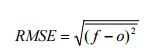

Σ = summation (“add up”) <br>
(zfi – Zoi)2 = differences, squared <br>
N = sample size.

Specifically, one must do the following to get the RMSE:
1. Squaring the residuals.
2. Finding the average of the residuals.
3. Taking the square root of the result.

#### Calculate RMSE function
Both methods get the same answer to verify the calculation was done correctly. <br>
Root Mean Square Error: 10023.7

In [ ]:
def calcRMSE(predictions, targets):
    difference=[]
    zip_object = zip(predictions, targets)
    for predictions, targets in zip_object:
        difference.append(predictions-targets)
    final=[]
    
    for d in difference:
        sq=d*d
        result=sq**.5
        final.append(result)
    return meanList(final)
        
RSME=calcRMSE(predictions, y_test)
print("Root Mean Square Error:", RSME)

#### Calulcate RMSE with numpy 

In [ ]:
def evalRMSE(predictions, targets):
    diff=np.subtract(predictions,targets)
    square=np.square(diff)
    MSE=square.mean()
    RMSE=np.sqrt(MSE)
    RMSE=np.round_(RSME, decimals=2)
    return RMSE

rmse=evalRMSE(predictions, y_test)
print("Root Mean Square Error:", rmse)

## Calculate r_sqared no imports
To make sure that the assignment is done correctly, I made a function to calculate r_squared. The answer should be 1. We will see if we get the correct answer.

In [ ]:
def calcR2(predicted, actual):
    diff=np.subtract(predicted,actual)
    ssres=sum(np.square(diff))
    sstot=sum(np.square(actual-np.mean(actual)))
    
    #ssres = sum((actual - predicted)**2)
    #sstot = sum((actual-np.mean(actual))**2)
    r2_m = 1-(ssres/sstot)
    return r2_m

r2=calcR2(predictions, y_test)
print("R_Squared: ", round(r2,4))

#### Plot Predictions vs Actual

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))

plt.title("Predictions and Actual", size=20,fontweight="bold")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## Linear Regression with imports
Extra section to verify that the linear regression prediction and error are correct by using the official imports from Sklearn. One of the most basic and used types of predictive modeling is linear regression. Linear regression can help find the strength and effect indepedent variables have on dependent variables. I will verify the results using sklearn imports, instead of doing it by hand.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error

#Get data as x and y:
x=sDF[['years']]
x=sDF[['salary']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=13)

#Fit and predict:
lrModel = LinearRegression()
lrModel.fit(X_train, y_train)
lrPredict = lrModel.predict(X_test)
print(lrPredict)

#Linear Metrics:
r2 = r2_score(y_test, lrPredict)
print("Linear regression r2 score: ", r2.round(4))

#PRINT COEFFICIENT:
lrCoef=lrModel.coef_  
print("Linear coef: ", lrCoef)

#PRINT MEAN SQUARED ERROR: 
lrRMSE=np.sqrt(metrics.mean_squared_error(y_test, lrPredict))
print("Linear regression MSE: ", round(lrRMSE,4))

## Plot Data
The graph clearly shows a trend that salary and years are correlated. Meaning, the more years experience, the salary tends to be higher. 

In [ ]:
import matplotlib.pyplot as plt
x=sDF['years']
y=sDF['salary']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b)

#add line of best fit to plot
plt.plot(x, a*x+b, color='red', linestyle='--', linewidth=2)
plt.title("Years and Salary", size=20,fontweight="bold")
plt.xlabel('Years',size=16, fontweight="bold")
plt.ylabel('Salary',size=16,fontweight="bold")
plt.show()

## References
1. https://www.urbanpro.com/machine-learning/linear-regression-without-any-libraries
2. https://dataaspirant.com/simple-linear-regression-python-without-any-machine-learning-libraries/